In [1]:
from keys import FTX_API_KEY, FTX_API_SECRET
import seaborn as sns
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utility_classes.correlation import Correlation, CSVManager
from utility_classes.historical_data_processor import FTXDataProcessor
import seaborn as sns 
import dateutil.parser as dp
corr = Correlation(perp_folder_path='/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/all_perps', spot_folder_path='/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/all_spots')

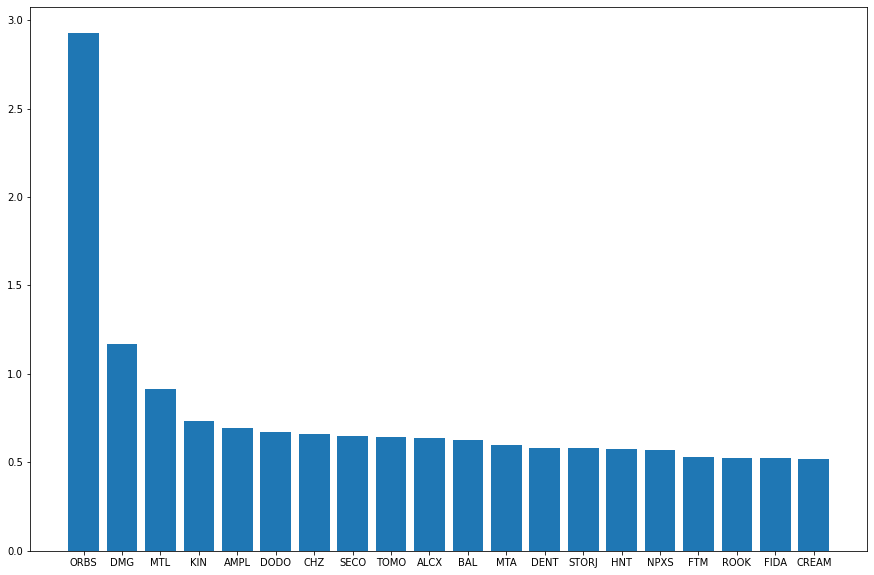

In [2]:
corr.rank_vol('H', lookback_period = 1000)


In [61]:


df_spot = CSVManager('/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/all_spots/RAY_historical_data.csv').change_resolution('H', 'SPOT')
df_perp = CSVManager('/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/all_perps/RAY-PERP_historical_data.csv').change_resolution('H', 'PERP')

df_perp.rename(columns={'open': 'perp_open', 'high': 'perp_high', 'low': 'perp_low', 'close': 'perp_close', 'volume': 'perp_volume'}, inplace=True)
df_spot.rename(columns={'open': 'spot_open', 'high': 'spot_high', 'low': 'spot_low', 'close': 'spot_close', 'volume': 'spot_volume'}, inplace=True)
                            
joint_df = pd.merge(df_perp, df_spot, how='inner', on=['timestamp'])

joint_df['spread_open'] = joint_df['perp_open'] - joint_df['spot_open']
joint_df['spread_open%'] = (joint_df['perp_open'] - joint_df['spot_open'])/joint_df['perp_open']*100

joint_df['spread_high'] = joint_df['perp_high'] - joint_df['spot_high']
joint_df['spread_high%'] = (joint_df['perp_high'] - joint_df['spot_high'])/joint_df['perp_high']*100

joint_df['spread_low'] = joint_df['perp_low'] - joint_df['spot_low']
joint_df['spread_low%'] =(joint_df['perp_low'] - joint_df['spot_low'])/joint_df['perp_low']*100

joint_df['spread_close'] = joint_df['perp_close'] - joint_df['spot_close']
joint_df['spread_close%'] = (joint_df['perp_close'] - joint_df['spot_close'])/joint_df['perp_close']*100



joint_df.drop(columns=['perp_open', 'spot_open', 'perp_high', 'spot_high', 'perp_low', 'spot_low', 'perp_close', 'spot_close'], inplace=True)
joint_df=joint_df.set_index('timestamp')
joint_df

,perp_volume,funding_rate,spot_volume,spread_open,spread_open%,spread_high,spread_high%,spread_low,spread_low%,spread_close,spread_close%
timestamp,,,,,,,,,,,
2021-02-21T15:00:00+00:00,1.498100e+07,-0.001150,1.556300e+07,-0.0311,-4.379973,-0.2529,-6.370277,-0.0311,-4.379973,0.0910,2.333333
2021-02-21T16:00:00+00:00,6.139649e+06,0.001206,7.178370e+06,0.0910,2.333333,0.2730,5.328909,0.0700,1.842105,0.0761,1.728681
2021-02-21T17:00:00+00:00,1.711130e+06,0.001198,2.054758e+06,0.0761,1.728681,0.0737,1.560218,0.0458,1.052898,0.0056,0.127273
2021-02-21T18:00:00+00:00,1.403088e+06,0.000252,1.404873e+06,0.0056,0.127273,-0.2200,-4.700855,0.0010,0.022826,0.0702,1.542857
2021-02-21T19:00:00+00:00,4.695849e+06,0.000430,2.894014e+06,0.0702,1.542857,0.8000,13.355593,-0.0500,-1.133787,0.2801,5.568035
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-02T20:00:00+00:00,1.721142e+05,-0.000086,9.245327e+04,-0.0401,-0.441635,0.0162,0.176016,-0.0298,-0.328197,-0.0350,-0.384294
2021-04-02T21:00:00+00:00,2.834061e+05,-0.000048,5.515246e+04,-0.0350,-0.384294,0.0317,0.343010,-0.0481,-0.529724,0.0020,0.021739
2021-04-02T22:00:00+00:00,2.115829e+05,-0.000004,8.930009e+04,0.0020,0.021739,0.0366,0.393798,0.0015,0.016359,0.0075,0.081186


In [72]:
joint_df['perp_volume'].iloc[0]

14981003.234299991

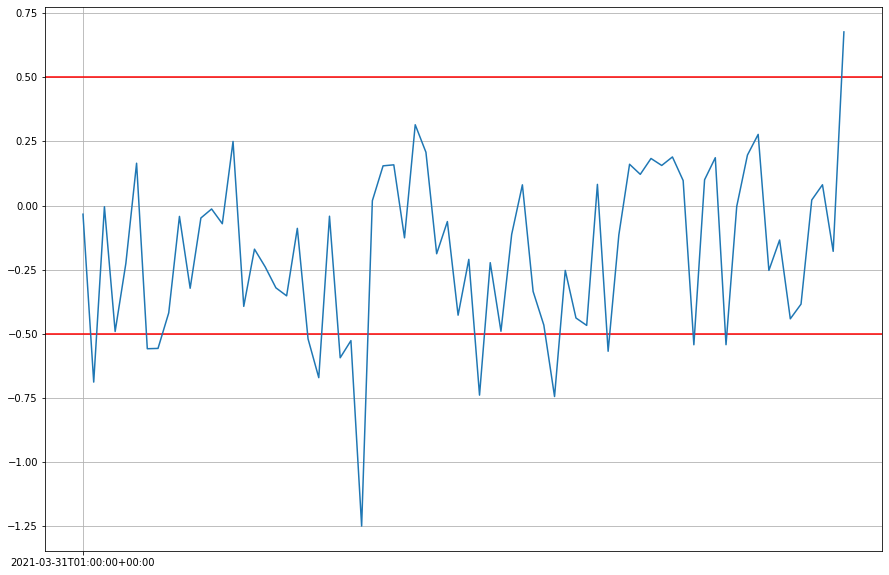

In [62]:
fig, ax = plt.subplots(figsize=(15,10))
spread_high=joint_df['spread_high%'].tail(72)
spread_low=joint_df['spread_low%'].tail(72)
spread_close=joint_df['spread_close%'].tail(72)

ax.set_xticks([0, 250, 500, 750, 999])
ax.grid()
ax.axhline(y=0.5, color='r', linestyle='-')
ax.axhline(y=-0.5, color='r', linestyle='-')

# ax.plot(spread_high)
ax.plot(spread_close)

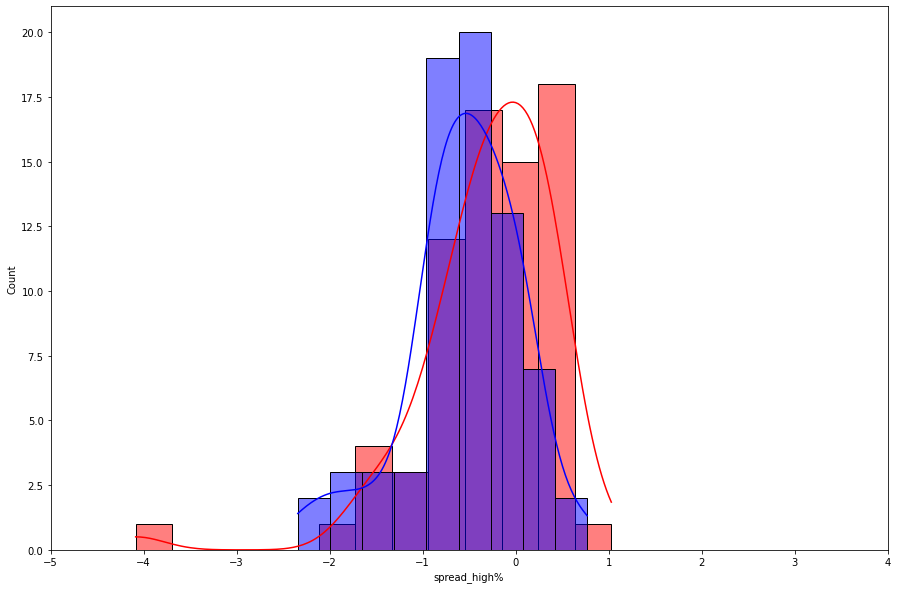

In [63]:
fig, ax = plt.subplots(figsize=(15,10))

sns.histplot(data=spread_high, color='r', kde=True)
# sns.histplot(data=spread_low, color='g', kde=True)
sns.histplot(data=spread_low, color='blue', kde=True)

ax.set_xticks(range(-5,5))

In [64]:
min_std = np.std(joint_df['spread_close%'].tail(72))
min_mean = np.mean(joint_df['spread_close%'].tail(72))
print(min_std, min_mean) 

0.3245789246977592 -0.18331134090893797
